# --- Add categorical columns: city, vehicle_type ---


### Impporting Libraries and Modules

In [2]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd

project_root = Path("/home/vansh/projects/project-nova").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.utils import set_seed
from src.config import DATA_DIR




 ### reproducible random choices

In [3]:
set_seed(42)

### Load DataSet

In [4]:
csv_path = DATA_DIR / "synthetic_basic_10k.csv"
df = pd.read_csv(csv_path)
df.head()


,partner_id,monthly_earnings,trips_per_week,avg_rating,cancellation_rate,active_days_per_month,Nova_Score
0,P00001,33973.71,27,4.40,0.050,23,71.01
1,P00002,28893.89,20,4.72,0.052,16,63.45
2,P00003,35181.51,31,4.66,0.069,23,81.22
3,P00004,42184.24,27,4.69,0.022,15,73.58
4,P00005,28126.77,26,4.71,0.019,5,66.21


### Define categories and (optional) realistic probabilities


In [5]:
cities = ["Delhi", "Mumbai", "Bengaluru", "Chennai", "Kolkata"]
city_probs = [0.24, 0.22, 0.20, 0.18, 0.16]  # must sum to 1.0
vehicles = ["Bike", "Car", "Auto"]
vehicle_probs = [0.5, 0.35, 0.15]  # half are bikes, fewer autos


### Add new columns


In [6]:
df["city"] = np.random.choice(cities, size=len(df), p=city_probs)
df["vehicle_type"] = np.random.choice(vehicles, size=len(df), p=vehicle_probs)

### (Optional) put columns in a nice order for readability


In [7]:
cols_order = [
    "partner_id",
    "monthly_earnings", "trips_per_week", "avg_rating",
    "cancellation_rate", "active_days_per_month",
    "city", "vehicle_type",
    "Nova_Score"
]
df = df[cols_order]

### Quick sanity checks


In [8]:
print(df[["city","vehicle_type"]].head(10))
print("\nCity distribution (%):")
print((df["city"].value_counts(normalize=True) * 100).round(2))
print("\nVehicle type distribution (%):")
print((df["vehicle_type"].value_counts(normalize=True) * 100).round(2))

        city vehicle_type
0     Mumbai         Bike
1    Kolkata         Bike
2    Chennai         Bike
3  Bengaluru          Car
4      Delhi         Bike
5      Delhi         Auto
6      Delhi         Bike
7    Kolkata          Car
8  Bengaluru          Car
9    Chennai          Car

City distribution (%):
city
Delhi        24.35
Mumbai       22.55
Bengaluru    20.08
Chennai      17.64
Kolkata      15.38
Name: proportion, dtype: float64

Vehicle type distribution (%):
vehicle_type
Bike    49.36
Car     34.98
Auto    15.66
Name: proportion, dtype: float64


# --- Data Cleaning for Realism ---


### 1. Remove impossible or unrealistic values


In [9]:
# Monthly earnings: no negative values, minimum realistic value ₹5,000
df["monthly_earnings"] = df["monthly_earnings"].clip(lower=5000)

# Trips per week: cap at 45 (full-time workers with occasional double shifts)
df["trips_per_week"] = df["trips_per_week"].clip(upper=45)

# Avg rating: enforce realistic rating range (3.0 to 5.0)
df["avg_rating"] = df["avg_rating"].clip(lower=3.0, upper=5.0)

# Cancellation rate: keep between 0 and 50% max
df["cancellation_rate"] = df["cancellation_rate"].clip(lower=0.0, upper=0.5)

# Active days per month: between 5 and 30
df["active_days_per_month"] = df["active_days_per_month"].clip(lower=5, upper=30)

# 2. Quick sanity check after cleaning
print(df.describe())

       monthly_earnings  trips_per_week    avg_rating  cancellation_rate  \
count      10000.000000    10000.000000  10000.000000       10000.000000   
mean       29985.302496       29.917500      4.583866           0.090257   
std         8019.566056        5.371516      0.278673           0.081271   
min         5000.000000       11.000000      3.260000           0.000000   
25%        24619.280000       26.000000      4.390000           0.029000   
50%        29979.240000       30.000000      4.600000           0.067000   
75%        35368.645000       33.000000      4.800000           0.129000   
max        61409.900000       45.000000      5.000000           0.500000   

       active_days_per_month    Nova_Score  
count           10000.000000  10000.000000  
mean               17.443000     67.240225  
std                 7.480946      8.857600  
min                 5.000000     34.960000  
25%                11.000000     61.420000  
50%                17.000000     67.275000  


### Save the new version with categorical columns


In [10]:
csv_path_with_cats = DATA_DIR / "synthetic_basic_10k_with_cats.csv"
df.to_csv(csv_path_with_cats, index=False)
print(f"Saved to: {csv_path_with_cats}")
df.head()

Saved to: /home/vansh/projects/project-nova/data/synthetic_basic_10k_with_cats.csv


,partner_id,monthly_earnings,trips_per_week,avg_rating,cancellation_rate,active_days_per_month,city,vehicle_type,Nova_Score
0,P00001,33973.71,27,4.40,0.050,23,Mumbai,Bike,71.01
1,P00002,28893.89,20,4.72,0.052,16,Kolkata,Bike,63.45
2,P00003,35181.51,31,4.66,0.069,23,Chennai,Bike,81.22
3,P00004,42184.24,27,4.69,0.022,15,Bengaluru,Car,73.58
4,P00005,28126.77,26,4.71,0.019,5,Delhi,Bike,66.21


### Importing Libs and Mods


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Display

In [12]:

# 1. Shape and column info
print("Data shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)

# 2. Missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 3. Summary statistics
display(df.describe())

Data shape: (10000, 9)

Column data types:
 partner_id                object
monthly_earnings         float64
trips_per_week             int64
avg_rating               float64
cancellation_rate        float64
active_days_per_month      int64
city                      object
vehicle_type              object
Nova_Score               float64
dtype: object

Missing values per column:
 partner_id               0
monthly_earnings         0
trips_per_week           0
avg_rating               0
cancellation_rate        0
active_days_per_month    0
city                     0
vehicle_type             0
Nova_Score               0
dtype: int64


,monthly_earnings,trips_per_week,avg_rating,cancellation_rate,active_days_per_month,Nova_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,29985.302496,29.917500,4.583866,0.090257,17.443000,67.240225
std,8019.566056,5.371516,0.278673,0.081271,7.480946,8.857600
min,5000.000000,11.000000,3.260000,0.000000,5.000000,34.960000
25%,24619.280000,26.000000,4.390000,0.029000,11.000000,61.420000
50%,29979.240000,30.000000,4.600000,0.067000,17.000000,67.275000
75%,35368.645000,33.000000,4.800000,0.129000,24.000000,73.230000
max,61409.900000,45.000000,5.000000,0.500000,30.000000,98.820000


###  Histograms for numeric columns


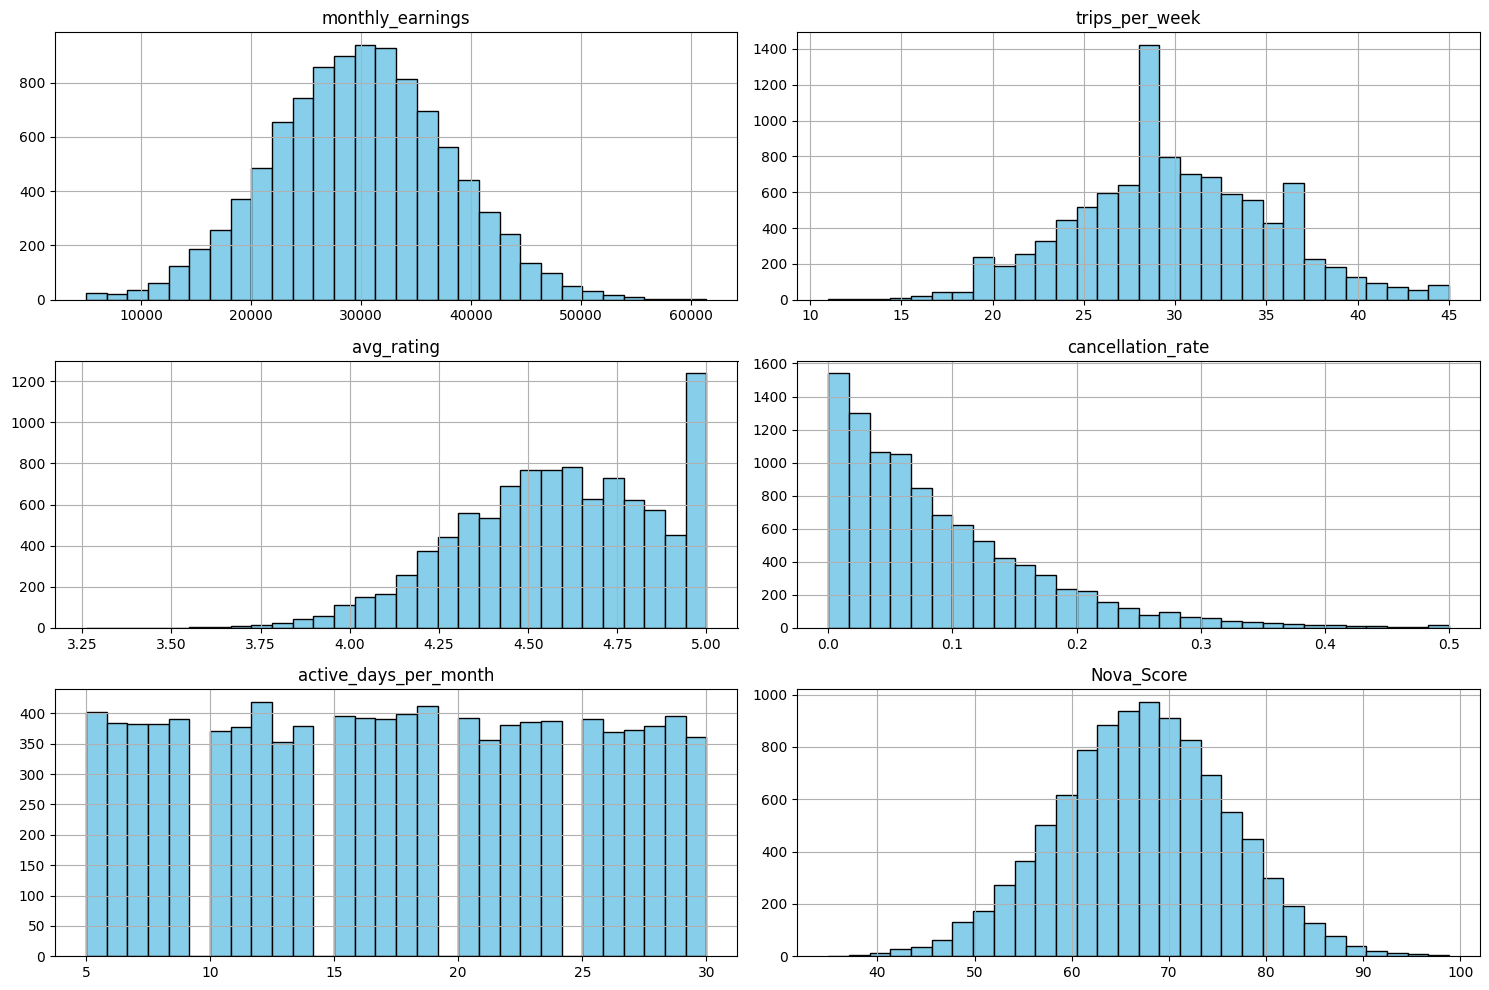

In [13]:

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Correlation heatmap


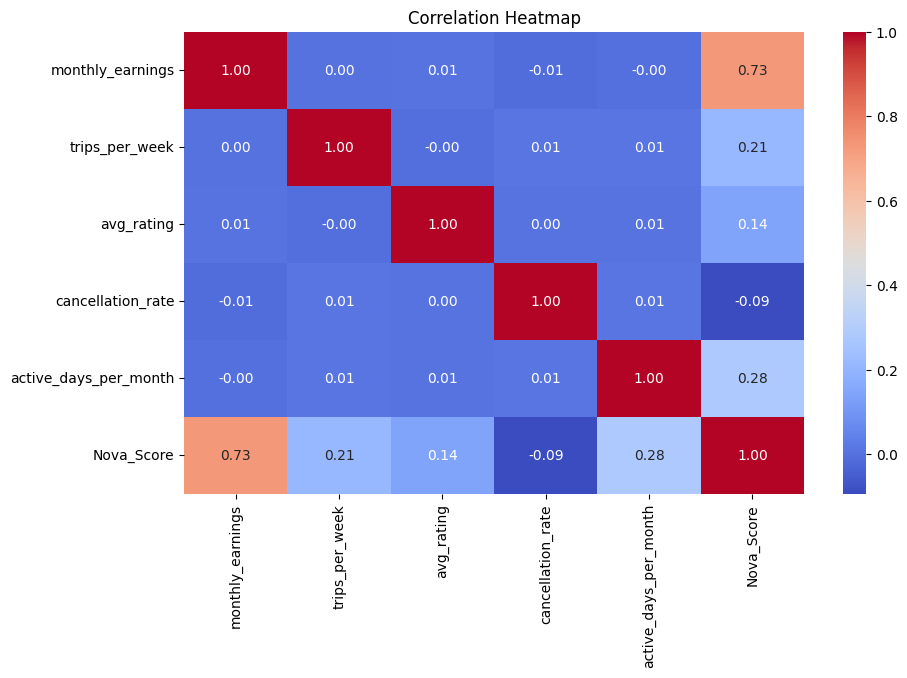

In [14]:

plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Outlier detection using Z-score method


In [15]:
z_scores = np.abs(zscore(df[numeric_cols].drop(columns=["Nova_Score"])))
outlier_counts = (z_scores > 3).sum()
print("\nOutlier counts per column:\n", outlier_counts)



Outlier counts per column:
 223


## Quick EDA — Findings

**1. Dataset Overview**  
- **Shape:** 10,000 rows × 9 columns.  
- Contains **5 numeric features**, **2 categorical features**, and **1 target variable** (`Nova_Score`).  
- No missing values detected in any column.

**2. Distribution Insights**  
- **Monthly Earnings:** Most drivers earn between ₹15,000–₹35,000, with a few high earners up to ₹61,000.  
- **Trips per Week:** Peaks around 20–35 trips, with rare high-activity drivers up to the capped value of 45.  
- **Average Rating:** Most ratings are high (4.0–5.0), as expected in service platforms.  
- **Cancellation Rate:** Majority under 20%, with a small fraction nearing the 50% cap.  
- **Active Days per Month:** Concentrated between 20–28 days, representing full-time workers.

**3. Correlation Insights**  
- `trips_per_week` and `monthly_earnings` show strong positive correlation — higher trips naturally lead to higher earnings.  
- `active_days_per_month` also correlates positively with earnings.  
- Weak or near-zero correlation between `avg_rating` and earnings, which is typical.

**4. Outlier Check**  
- A few statistical outliers exist in `monthly_earnings` and `trips_per_week`, but these are within realistic operational extremes.  
- No need for removal at this stage; they may carry meaningful information for the model.

**Conclusion:**  
The dataset appears clean, balanced, and realistic. We can proceed with **feature engineering** to extract more predictive signals before modeling.


# --- FEATURE ENGINEERING: DERIVED NUMERIC FEATURES ---


In [16]:
# 1. Earnings per Active Day
df["earnings_per_active_day"] = df["monthly_earnings"] / df["active_days_per_month"]

# 2. Trips per Active Day
df["trips_per_active_day"] = df["trips_per_week"] / 7  # weekly trips to daily trips

# 3. Estimated Cancellation Count (monthly)
# Assuming 4 weeks per month
df["estimated_cancellations_per_month"] = (
    df["trips_per_week"] * 4 * df["cancellation_rate"]
)

# 4. High Activity Flag (1 if active days >= 25, else 0)
df["high_activity_flag"] = (df["active_days_per_month"] >= 25).astype(int)

# 5. Quick check of new features
df[[
    "earnings_per_active_day", 
    "trips_per_active_day", 
    "estimated_cancellations_per_month", 
    "high_activity_flag"
]].describe()

,earnings_per_active_day,trips_per_active_day,estimated_cancellations_per_month,high_activity_flag
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2214.483517,4.273929,10.822278,0.226900
std,1470.751841,0.767359,10.118171,0.418848
min,166.666667,1.571429,0.000000,0.000000
25%,1219.817475,3.714286,3.347000,0.000000
50%,1716.091601,4.285714,7.812000,0.000000
75%,2733.184500,4.714286,15.348000,0.000000
max,10708.878000,6.428571,80.360000,1.000000


# --- FEATURE ENGINEERING: CATEGORICAL ENCODING ---


In [17]:
# One-hot encode city and vehicle_type
df_encoded = pd.get_dummies(df, columns=["city", "vehicle_type"], drop_first=False)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)

# Quick check of new columns
df_encoded.head()

Original shape: (10000, 13)
Encoded shape: (10000, 19)


,partner_id,monthly_earnings,trips_per_week,avg_rating,cancellation_rate,active_days_per_month,Nova_Score,earnings_per_active_day,trips_per_active_day,estimated_cancellations_per_month,high_activity_flag,city_Bengaluru,city_Chennai,city_Delhi,city_Kolkata,city_Mumbai,vehicle_type_Auto,vehicle_type_Bike,vehicle_type_Car
0,P00001,33973.71,27,4.40,0.050,23,71.01,1477.117826,3.857143,5.400,0,False,False,False,False,True,False,True,False
1,P00002,28893.89,20,4.72,0.052,16,63.45,1805.868125,2.857143,4.160,0,False,False,False,True,False,False,True,False
2,P00003,35181.51,31,4.66,0.069,23,81.22,1529.630870,4.428571,8.556,0,False,True,False,False,False,False,True,False
3,P00004,42184.24,27,4.69,0.022,15,73.58,2812.282667,3.857143,2.376,0,True,False,False,False,False,False,False,True
4,P00005,28126.77,26,4.71,0.019,5,66.21,5625.354000,3.714286,1.976,0,False,False,True,False,False,False,True,False


### Save encoded dataset to data/ folder


In [18]:
encoded_path = DATA_DIR / "synthetic_features_encoded_v1.csv"
df_encoded.to_csv(encoded_path, index=False)
print(f"Encoded dataset saved to: {encoded_path}")

Encoded dataset saved to: /home/vansh/projects/project-nova/data/synthetic_features_encoded_v1.csv


### Quick reload check


In [19]:
test_df = pd.read_csv(encoded_path)
print(test_df.shape)
test_df.head()

(10000, 19)


,partner_id,monthly_earnings,trips_per_week,avg_rating,cancellation_rate,active_days_per_month,Nova_Score,earnings_per_active_day,trips_per_active_day,estimated_cancellations_per_month,high_activity_flag,city_Bengaluru,city_Chennai,city_Delhi,city_Kolkata,city_Mumbai,vehicle_type_Auto,vehicle_type_Bike,vehicle_type_Car
0,P00001,33973.71,27,4.40,0.050,23,71.01,1477.117826,3.857143,5.400,0,False,False,False,False,True,False,True,False
1,P00002,28893.89,20,4.72,0.052,16,63.45,1805.868125,2.857143,4.160,0,False,False,False,True,False,False,True,False
2,P00003,35181.51,31,4.66,0.069,23,81.22,1529.630870,4.428571,8.556,0,False,True,False,False,False,False,True,False
3,P00004,42184.24,27,4.69,0.022,15,73.58,2812.282667,3.857143,2.376,0,True,False,False,False,False,False,False,True
4,P00005,28126.77,26,4.71,0.019,5,66.21,5625.354000,3.714286,1.976,0,False,False,True,False,False,False,True,False


# --- VISUALIZATION: NUMERIC FEATURES vs TARGET ---


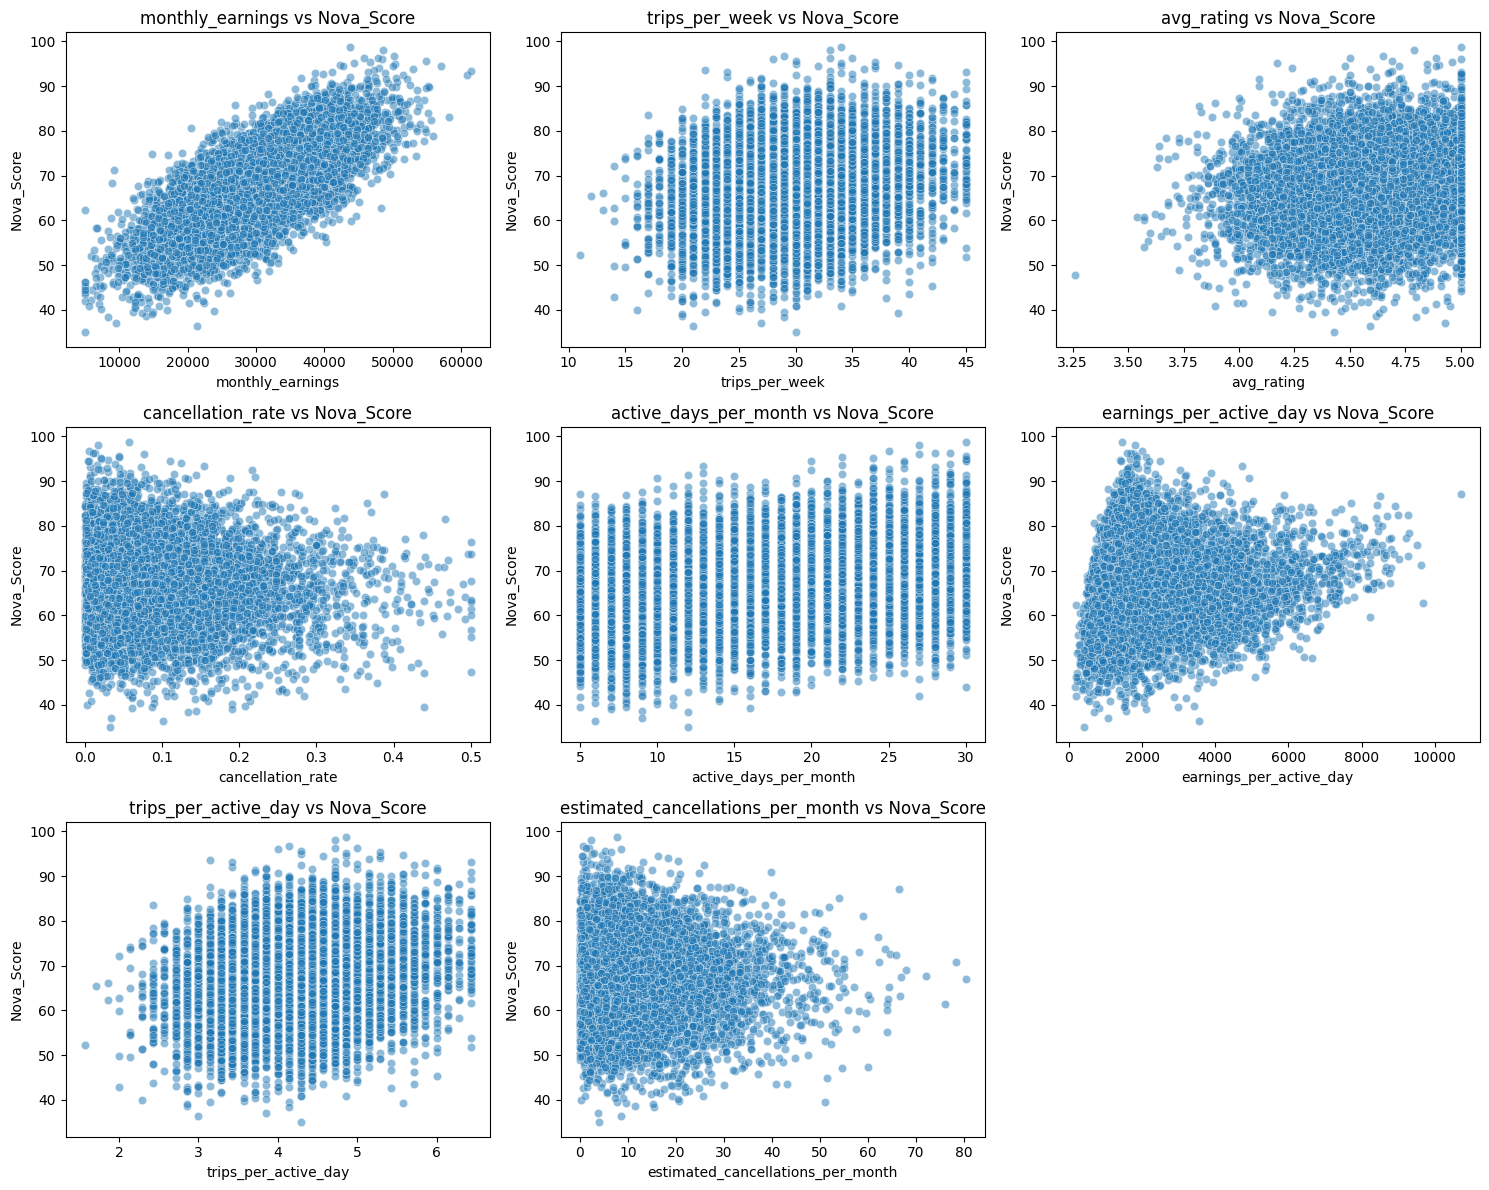

In [23]:
numeric_cols = [
    "monthly_earnings", "trips_per_week", "avg_rating", "cancellation_rate",
    "active_days_per_month", "earnings_per_active_day",
    "trips_per_active_day", "estimated_cancellations_per_month"
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df["Nova_Score"], alpha=0.5)
    plt.title(f"{col} vs Nova_Score")
plt.tight_layout()
plt.show()